<a href="https://www.kaggle.com/code/sonalanand/spotify-project-day-02?scriptVersionId=230574726" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Let’s dive into the rhythms, moods, and metrics that shaped the sound of 2023 🎶👇



📊 Spotify 2023 Analysis Day 02 



: Unlocking Patterns in Music Trends
Welcome to an insightful exploration of the Spotify 2023 dataset, where we uncover trends in song popularity, mood, rhythm, and more through clean and creative visual analysis.

This notebook demonstrates practical expertise in key data analysis concepts, including:

🔍 What You'll Find in This Notebook
🎯 Feature Engineering using lambda functions

📈 Aggregation & Grouping with groupby()

🧠 Custom Metric Creation like Final Popularity Score

📊 Seaborn & Matplotlib Visualisations

🎨 Heatmaps, Pie Charts, Barplots & Scatter Plots

🔁 Binning & Categorisation for BPM, Energy, and Danceability

💡 Insights into mood, genre trends, and musical patterns








🛠️ Tools & Libraries
pandas for data wrangling

matplotlib & seaborn for visualisation

lambda, apply, cut, and other Pythonic methods

In [1]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/spotify-dataset-for-self-practise/spotify_2023.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Correct file path based on the output
file_path = "/kaggle/input/spotify-dataset-for-self-practise/spotify_2023.csv"

# Load the CSV file
try:
    df = pd.read_csv(file_path, encoding="ISO-8859-1")
    print("Dataset loaded successfully.")
    print(df.head())
except FileNotFoundError:
    print(f"File not found: {file_path}. Please check the file path.")

Dataset loaded successfully.
                            track_name    artist(s)_name  artist_count  \
0  Seven (feat. Latto) (Explicit Ver.)  Latto, Jung Kook             2   
1                                 LALA       Myke Towers             1   
2                              vampire    Olivia Rodrigo             1   
3                         Cruel Summer      Taylor Swift             1   
4                       WHERE SHE GOES         Bad Bunny             1   

   released_year  released_month  released_day  in_spotify_playlists  \
0           2023               7            14                   553   
1           2023               3            23                  1474   
2           2023               6            30                  1397   
3           2019               8            23                  7858   
4           2023               5            18                  3133   

   in_spotify_charts    streams  in_apple_playlists  ...  bpm key   mode  \
0                

📌 Day 2 – Feature Engineering, GroupBy, Aggregations & Visual Insights (Spotify Dataset)
---

### 🔁 Lambda Functions & Feature Engineering

**Q1: Final Popularity Score**  
👉 Create a new column `final_popularity` using the formula:  
\`\`\`python
final_popularity = streams * (1 - (danceability_% / 100))
\`\`\`
This reduces popularity for highly danceable tracks.

---

**Q2: Categorise Popularity**  
👉 Create a column `popularity_category` using a lambda function:
- "High Popularity" if streams > 500,000,000
- "Moderate Popularity" if 100M ≤ streams ≤ 500M
- "Low Popularity" otherwise

---

**Q3: Classify Song Mood (valence + energy)**  
👉 Create a new column `song_mood` based on these conditions:
- High valence & high energy → "Happy Banger"
- High valence & low energy → "Chill Happy"
- Low valence & high energy → "Powerful/Angry"
- Low valence & low energy → "Sad/Mellow"

(Hint: Threshold = 50 for both valence and energy percentages)

---

### 🔢 GroupBy & Aggregation

**Q4: Average Danceability for Top 10 Artists (by total streams)**  
👉 Group by artist(s)_name, compute average `danceability_%` and total `streams`, then display the top 10.

---

**Q5: Stream Trends by Decade**  
👉 Create a `decade` column from `released_year` and group by it to see total streams per decade.

---

### 📊 Graph-Based Insight Practice

**Q6: Energy vs Danceability Scatter Plot**  
👉 Create a scatter plot:
- X-axis: `energy_%`
- Y-axis: `danceability_%`
- Colour by `valence_%`
- Optional: Bubble size by `streams`

---

**Q7: Correlation Heatmap**  
👉 Plot a heatmap to visualise correlations among numerical columns like:
- `streams`, `danceability_%`, `energy_%`, `valence_%`, `acousticness_%`, `liveness_%`, etc.

---

**Q8: BPM vs Streams Binned Insight**  
👉 Bin BPM into intervals (e.g. 60–90, 91–120, 121–150, etc.).  
👉 Find average `streams` in each bin and plot a bar chart.

---

### ✅ Bonus Task
**Q9: Which combination of danceability + energy gives the best average popularity score?**  
👉 Create bins for both `danceability_%` and `energy_%`. Use `groupby` to calculate the average `final_popularity` score for each bin combo. Plot as a heatmap.

---

In [3]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [5]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

In [6]:
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

In [7]:
df['key'] = df['key'].fillna(0)

In [8]:
df.isna().sum().sum()

0

In [9]:
print(df.columns)

Index(['track_name', 'artist(s)_name', 'artist_count', 'released_year',
       'released_month', 'released_day', 'in_spotify_playlists',
       'in_spotify_charts', 'streams', 'in_apple_playlists', 'in_apple_charts',
       'in_deezer_playlists', 'in_deezer_charts', 'in_shazam_charts', 'bpm',
       'key', 'mode', 'danceability_%', 'valence_%', 'energy_%',
       'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%'],
      dtype='object')


Q1: Final Popularity Score**  
👉 Create a new column `final_popularity` using the formula:  

final_popularity = streams * (1 - (danceability_% / 100))

This reduces popularity for highly danceable tracks.

In [10]:

df['streams'] = pd.to_numeric(df['streams'], errors = 'coerce')                # made sure to conert to numeric before we use them.


df['final_popularity'] = df['streams'] * (1 - (df['danceability_%'] / 100))    # formula given in question.

**Q2: Categorise Popularity**  
👉 Create a column `popularity_category` using a lambda function:
- "High Popularity" if streams > 500,000,000
- "Moderate Popularity" if 100M ≤ streams ≤ 500M
- "Low Popularity" otherwise

In [11]:
df['popularity_category'] = df['streams'].apply(lambda x : "High Popularity" if x > 500000000 else 'Moderate Polpularity' if 
                                                100000000 <= x <= 500000000 else "Low Popularity")

In [12]:
df['popularity_category'].value_counts()

popularity_category
Moderate Polpularity    492
High Popularity         308
Low Popularity          153
Name: count, dtype: int64

**Q3: Classify Song Mood (valence + energy)**  
👉 Create a new column `song_mood` based on these conditions:
- High valence & high energy → "Happy Banger"
- High valence & low energy → "Chill Happy"
- Low valence & high energy → "Powerful/Angry"
- Low valence & low energy → "Sad/Mellow"

(Hint: Threshold = 50 for both valence and energy percentages)

In [13]:
df['song_mood'] = df.apply(lambda x : "Happy Banger" if ((x['valence_%'] > 50) & (x['energy_%'] > 50)) else 'Chill Happy' if
                          ((x['valence_%'] > 50) & (x['energy_%'] < 50)) else 'Powerful/Angry' if
                          ((x['valence_%'] < 50) & (x['energy_%'] > 50)) else 'Sad/Mellow', axis = 1)

In [14]:
df['song_mood'].value_counts()

song_mood
Happy Banger      431
Powerful/Angry    317
Sad/Mellow        150
Chill Happy        55
Name: count, dtype: int64

In [15]:

label = df['song_mood'].value_counts().index

datas = df['song_mood'].value_counts().values


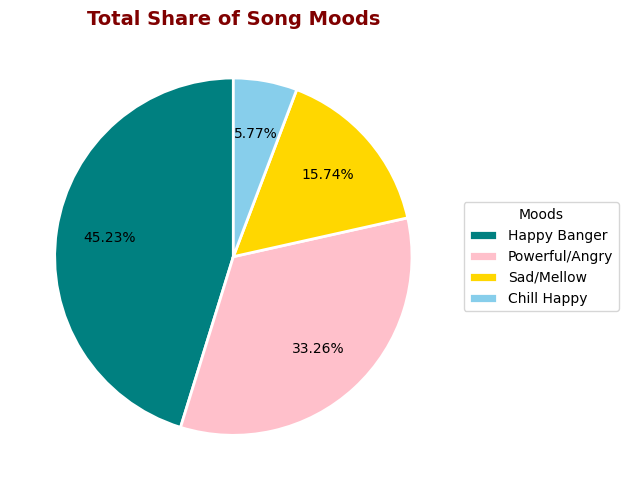

In [16]:
plt.figure(figsize=(10, 5))


plt.pie(x = datas, autopct='%1.2f%%', startangle=90, colors=['teal', 'pink', 'gold', 'skyblue'], labeldistance=0.5, pctdistance=0.7, 
        wedgeprops={'edgecolor': 'white', 'linewidth': 2})


plt.title('Total Share of Song Moods', fontsize=14, fontweight='bold', color='maroon')



plt.legend(label, title='Moods', loc='center left', bbox_to_anchor=(1, 0.5))


plt.tight_layout()
plt.show()


**Q4: Average Danceability for Top 10 Artists (by total streams)**  
👉 Group by artist(s)_name, compute average `danceability_%` and total `streams`, then display the top 10.

In [17]:
average_danceability_top_ten = df.groupby('artist(s)_name').agg({
    'danceability_%':'mean',
    'streams' : 'sum'
})



In [18]:
average_danceability_top_ten.sort_values(by = 'streams', ascending = False).head(10)

,danceability_%,streams
artist(s)_name,,
The Weeknd,57.681818,1.418555e+10
Taylor Swift,59.764706,1.405366e+10
Ed Sheeran,69.666667,1.390895e+10
Harry Styles,61.352941,1.160865e+10
Bad Bunny,75.157895,9.997800e+09
Olivia Rodrigo,51.285714,7.442149e+09
Eminem,79.750000,6.183806e+09
Bruno Mars,62.000000,5.846921e+09
Arctic Monkeys,56.250000,5.569807e+09


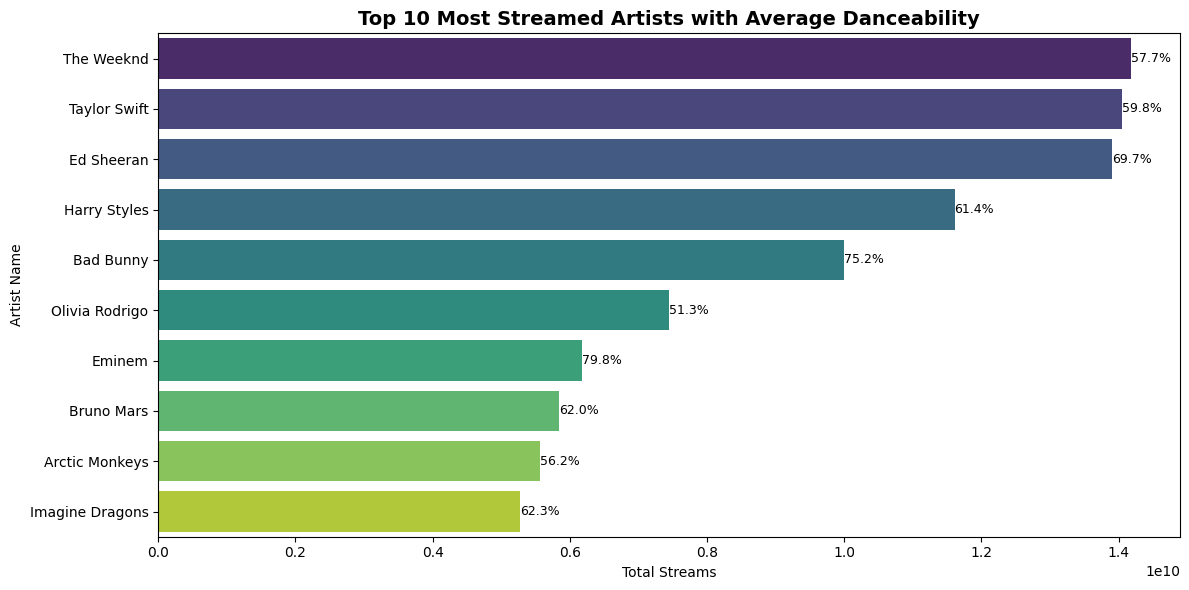

In [19]:

# Step 1: Prepare the top 10 data
top10 = average_danceability_top_ten.sort_values(by='streams', ascending=False).head(10).reset_index()

# Step 2: Plot using seaborn
plt.figure(figsize=(12, 6))

barplot = sns.barplot(
    data=top10,
    y='artist(s)_name',
    x='streams',
    palette='viridis'
)

# Step 3: Annotate with average danceability
for index, row in top10.iterrows():
    plt.text(
        row['streams'],        # x-position (end of the bar)
        index,                 # y-position
        f"{row['danceability_%']:.1f}%",  # label text
        va='center', ha='left',
        fontsize=9, color='black'
    )

# Step 4: Style the plot
plt.title("Top 10 Most Streamed Artists with Average Danceability", fontsize=14, fontweight='bold')
plt.xlabel("Total Streams")
plt.ylabel("Artist Name")


plt.tight_layout()
plt.show()


**Q5: Stream Trends by Decade**  
👉 Create a `decade` column from `released_year` and group by it to see total streams per decade.

In [20]:
df['Decade'] = df['released_year'].apply(lambda x : (x//10) * 10)

In [21]:
df.groupby('Decade')['streams'].sum().sort_index()

Decade
1930    9.059852e+07
1940    7.853634e+08
1950    3.672782e+09
1960    2.456991e+09
1970    6.429159e+09
1980    1.033316e+10
1990    1.361563e+10
2000    2.317597e+10
2010    1.781765e+11
2020    2.507227e+11
Name: streams, dtype: float64

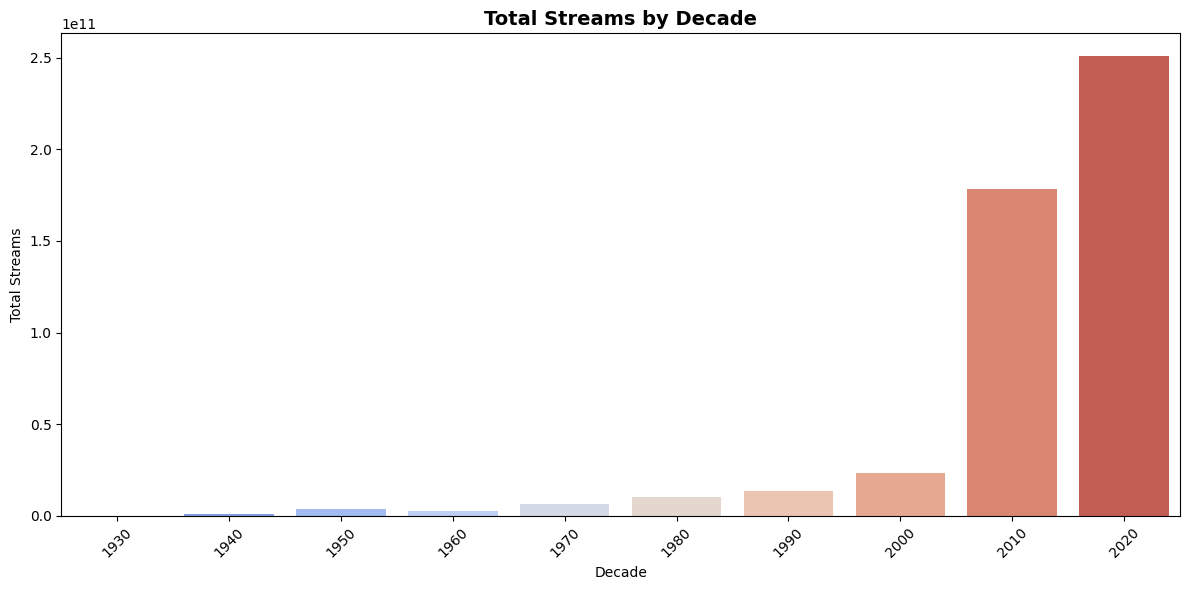

In [22]:

# Group and prepare the data
df['Decade'] = df['released_year'].apply(lambda x: (x // 10) * 10)
streams_by_decade = df.groupby('Decade')['streams'].sum().reset_index().sort_values('Decade')

# Plot
plt.figure(figsize=(12, 6))


sns.barplot(data=streams_by_decade, x='Decade', y='streams', palette='coolwarm')



# Format y-axis to use commas
#plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{int(x):,}'))

# Style
plt.title("Total Streams by Decade", fontsize=14, fontweight='bold')
plt.xlabel("Decade")
plt.ylabel("Total Streams")
plt.xticks(rotation=45)



plt.tight_layout()
plt.show()


**Q6: Energy vs Danceability Scatter Plot**  
👉 Create a scatter plot:
- X-axis: `energy_%`
- Y-axis: `danceability_%`
- Colour by `valence_%`
- Optional: Bubble size by `streams`

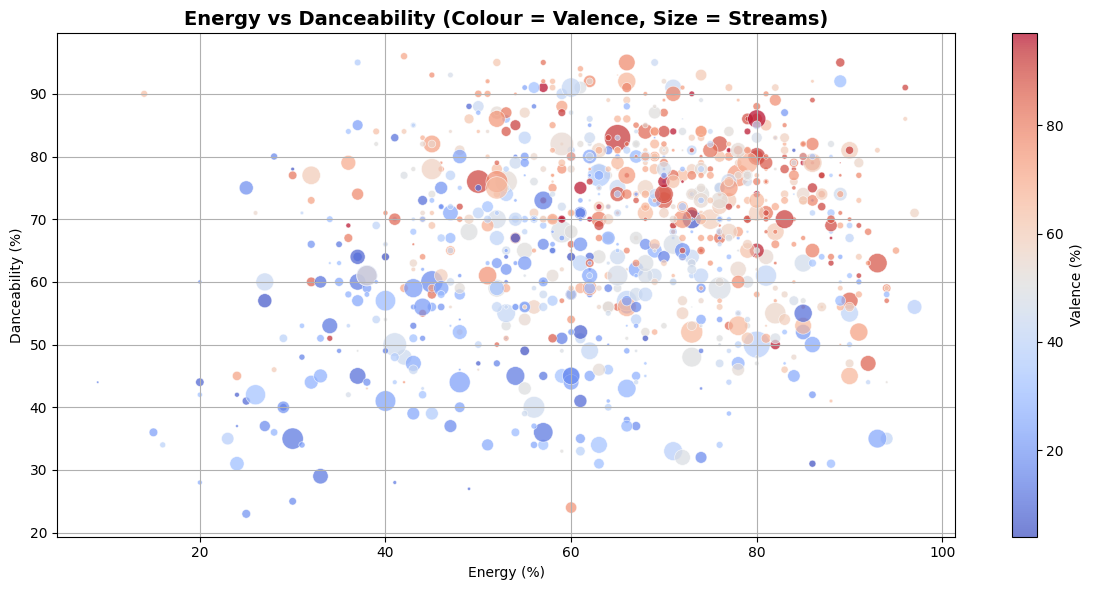

In [23]:

plt.figure(figsize=(12, 6))

# Scatter plot
scatter = plt.scatter(
    x=df['energy_%'],
    y=df['danceability_%'],
    c=df['valence_%'],                # colour by valence
    s=df['streams'] / 1e7,            # optional: scale stream values for bubble size
    cmap='coolwarm',                  # colour map: red-blue scale
    alpha=0.7, edgecolors='w', linewidth=0.5
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label('Valence (%)')

# Labels and styling
plt.title("Energy vs Danceability (Colour = Valence, Size = Streams)", fontsize=14, fontweight='bold')
plt.xlabel("Energy (%)")
plt.ylabel("Danceability (%)")



plt.grid(True)



plt.tight_layout()
plt.show()


**Q7: Correlation Heatmap**  
👉 Plot a heatmap to visualise correlations among numerical columns like:
- `streams`, `danceability_%`, `energy_%`, `valence_%`, `acousticness_%`, `liveness_%`, etc.

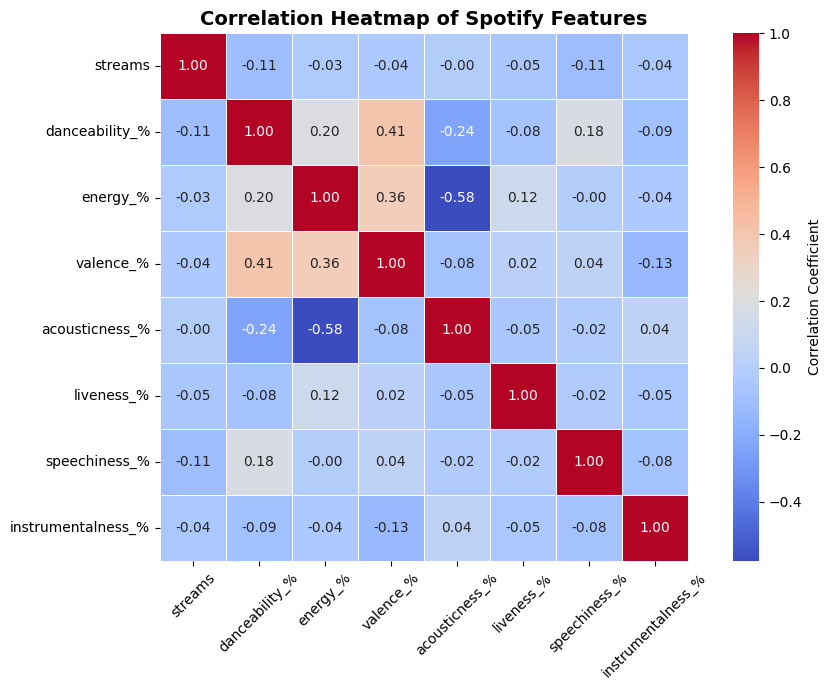

In [24]:

# Step 1: Choose numeric columns to include in the correlation
selected_features = [
    'streams', 'danceability_%', 'energy_%',
    'valence_%', 'acousticness_%', 'liveness_%',
    'speechiness_%', 'instrumentalness_%'
]

# Step 2: Calculate correlation matrix
corr = df[selected_features].corr()

# Step 3: Plot the heatmap using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(
    corr,
    annot=True,          # show correlation values
    fmt=".2f",           # format values to 2 decimals
    cmap="coolwarm",     # color palette
    square=True,         # make cells square
    linewidths=0.5,      # lines between squares
    cbar_kws={"label": "Correlation Coefficient"}  # colorbar label
)

# Step 4: Style
plt.title("Correlation Heatmap of Spotify Features", fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


**Q8: BPM vs Streams Binned Insight**  
👉 Bin BPM into intervals (e.g. 60–90, 91–120, 121–150, etc.).  
👉 Find average `streams` in each bin and plot a bar chart.

<ipython-input-25-e8ba2ea8c141>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bpm_streams = df.groupby('bpm_range')['streams'].mean().reset_index()
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


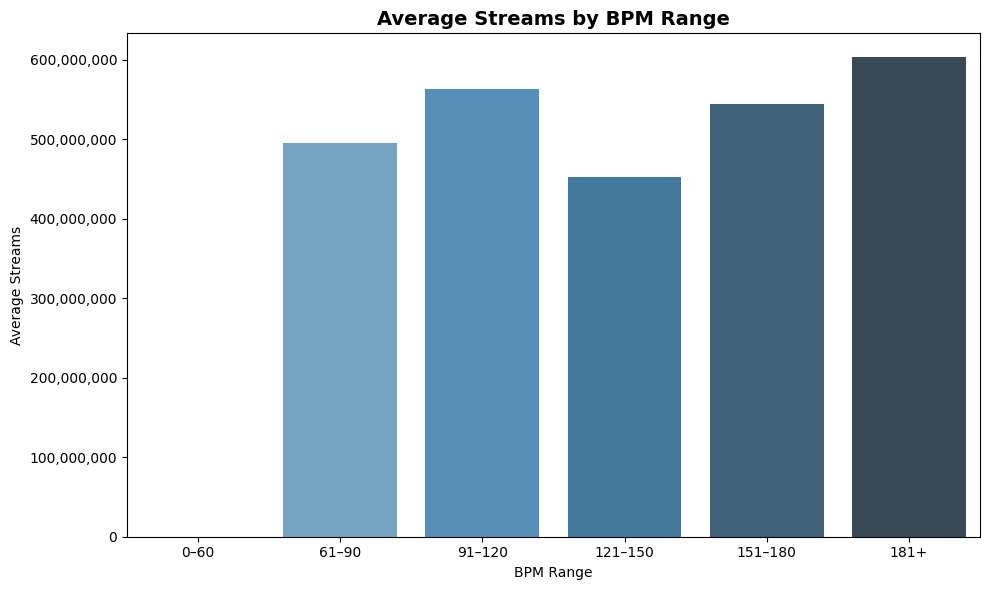

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Step 1: Define BPM bins and labels
bins = [0, 60, 90, 120, 150, 180, 250]
labels = ['0–60', '61–90', '91–120', '121–150', '151–180', '181+']

# Step 2: Create a new binned column
df['bpm_range'] = pd.cut(df['bpm'], bins=bins, labels=labels, right=False)

# Step 3: Group by bpm_range and calculate average streams
bpm_streams = df.groupby('bpm_range')['streams'].mean().reset_index()

# Step 4: Plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(
    data=bpm_streams,
    x='bpm_range',
    y='streams',
    palette='Blues_d'
)

# Step 5: Style it
plt.title("Average Streams by BPM Range", fontsize=14, fontweight='bold')
plt.xlabel("BPM Range")
plt.ylabel("Average Streams")
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))
plt.tight_layout()
plt.show()


**Q9: Which combination of danceability + energy gives the best average popularity score?**  
👉 Create bins for both `danceability_%` and `energy_%`. Use `groupby` to calculate the average `final_popularity` score for each bin combo. Plot as a heatmap.

<ipython-input-26-4df4a6a780bb>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  heatmap_data = df.groupby(['dance_bin', 'energy_bin'])['final_popularity'].mean().reset_index()
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


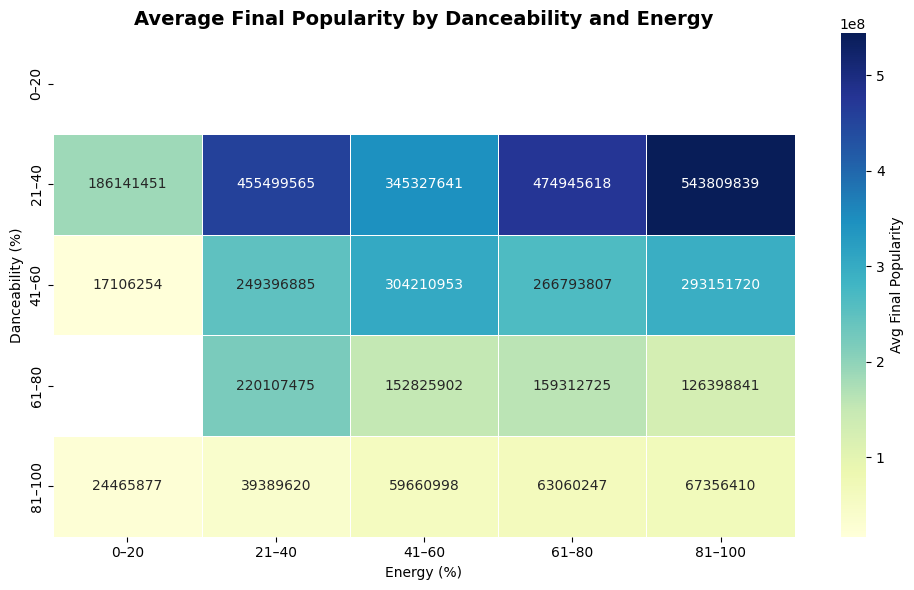

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create bins
dance_bins = [0, 20, 40, 60, 80, 100]
energy_bins = [0, 20, 40, 60, 80, 100]

df['dance_bin'] = pd.cut(df['danceability_%'], bins=dance_bins, labels=['0–20','21–40','41–60','61–80','81–100'], right=False)
df['energy_bin'] = pd.cut(df['energy_%'], bins=energy_bins, labels=['0–20','21–40','41–60','61–80','81–100'], right=False)

# Step 2: Group by both bins and calculate average final popularity
heatmap_data = df.groupby(['dance_bin', 'energy_bin'])['final_popularity'].mean().reset_index()

# Step 3: Pivot to create matrix for heatmap
heatmap_matrix = heatmap_data.pivot(index='dance_bin', columns='energy_bin', values='final_popularity')

# Step 4: Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    heatmap_matrix,
    annot=True, fmt=".0f",
    cmap='YlGnBu',
    linewidths=0.5,
    cbar_kws={'label': 'Avg Final Popularity'}
)

# Step 5: Style
plt.title("Average Final Popularity by Danceability and Energy", fontsize=14, fontweight='bold')
plt.xlabel("Energy (%)")
plt.ylabel("Danceability (%)")
plt.tight_layout()
plt.show()


In [27]:
df

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,instrumentalness_%,liveness_%,speechiness_%,final_popularity,popularity_category,song_mood,Decade,bpm_range,dance_bin,energy_bin
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,0,8,4,2.827634e+07,Moderate Polpularity,Happy Banger,2020,121–150,81–100,81–100
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,0,10,4,3.877772e+07,Moderate Polpularity,Happy Banger,2020,91–120,61–80,61–80
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,0,31,6,6.860195e+07,Moderate Polpularity,Powerful/Angry,2020,121–150,41–60,41–60
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,0,11,15,3.603784e+08,High Popularity,Happy Banger,2010,151–180,41–60,61–80
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,63,11,6,1.061327e+08,Moderate Polpularity,Powerful/Angry,2020,121–150,61–80,81–100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363.0,61,...,0,8,3,3.658935e+07,Low Popularity,Sad/Mellow,2020,121–150,61–80,21–40
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870.0,4,...,1,12,6,7.068568e+07,Moderate Polpularity,Sad/Mellow,2020,151–180,41–60,21–40
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683.0,2,...,0,8,6,1.470274e+07,Low Popularity,Happy Banger,2020,91–120,81–100,61–80
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612.0,29,...,0,12,5,2.410121e+07,Moderate Polpularity,Happy Banger,2020,91–120,81–100,61–80
